In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd
df= pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
df.shape

(1462, 5)

In [7]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [11]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


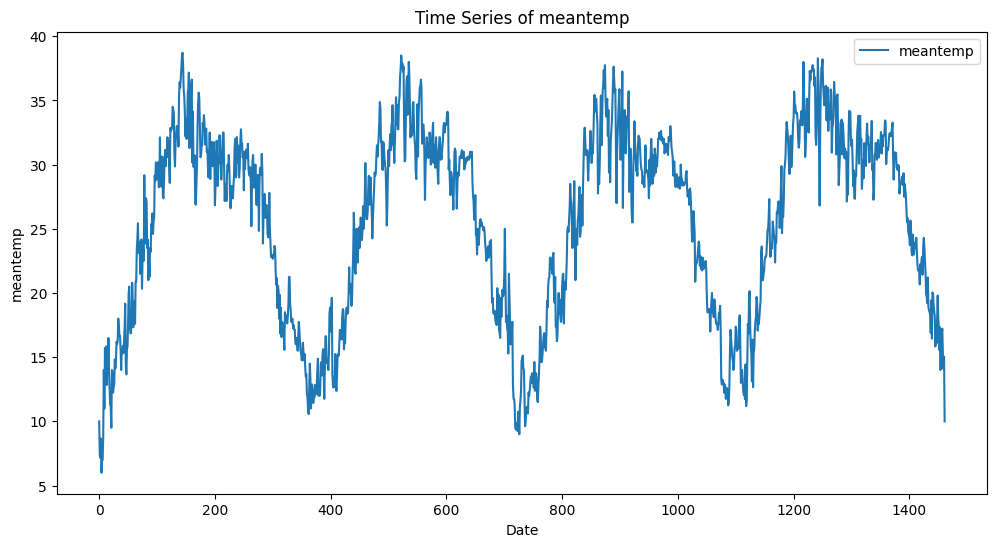

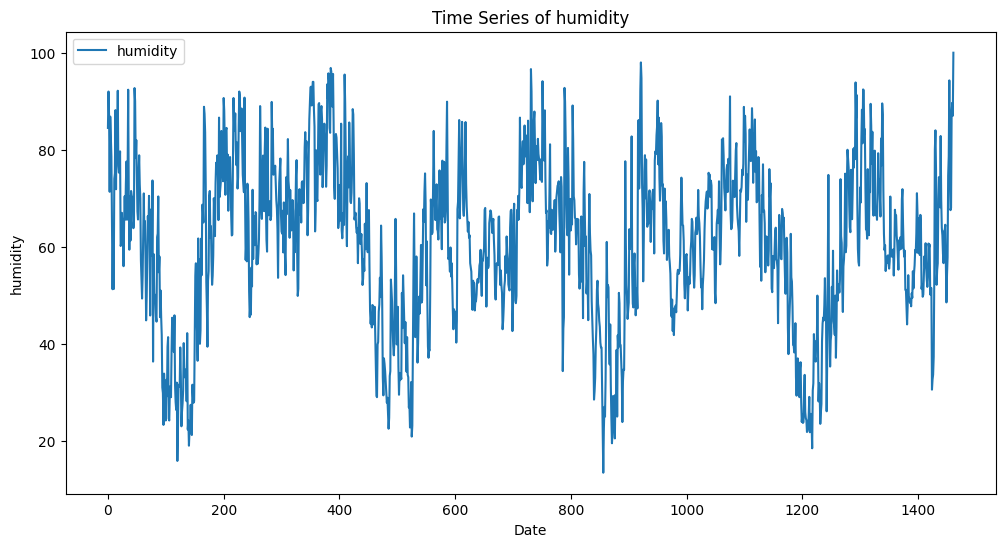

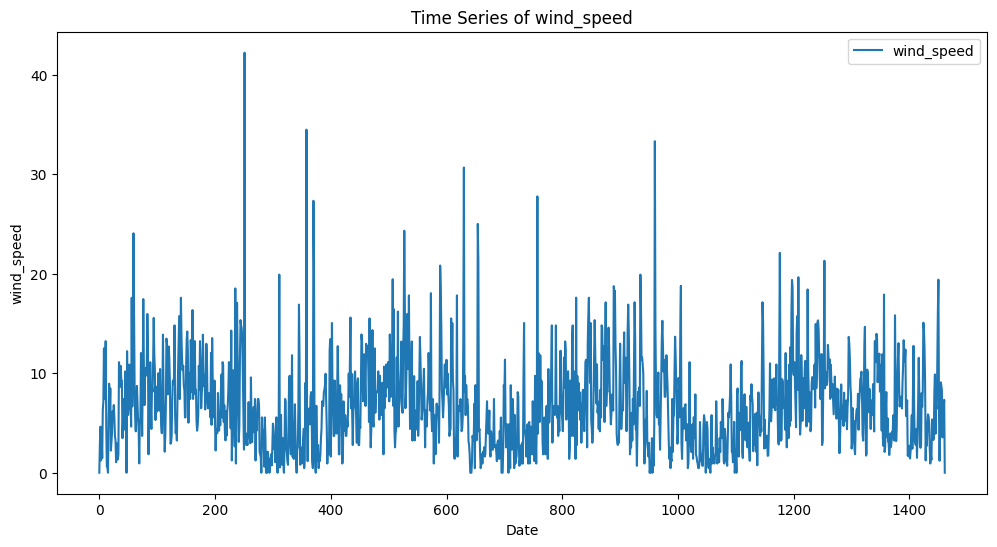

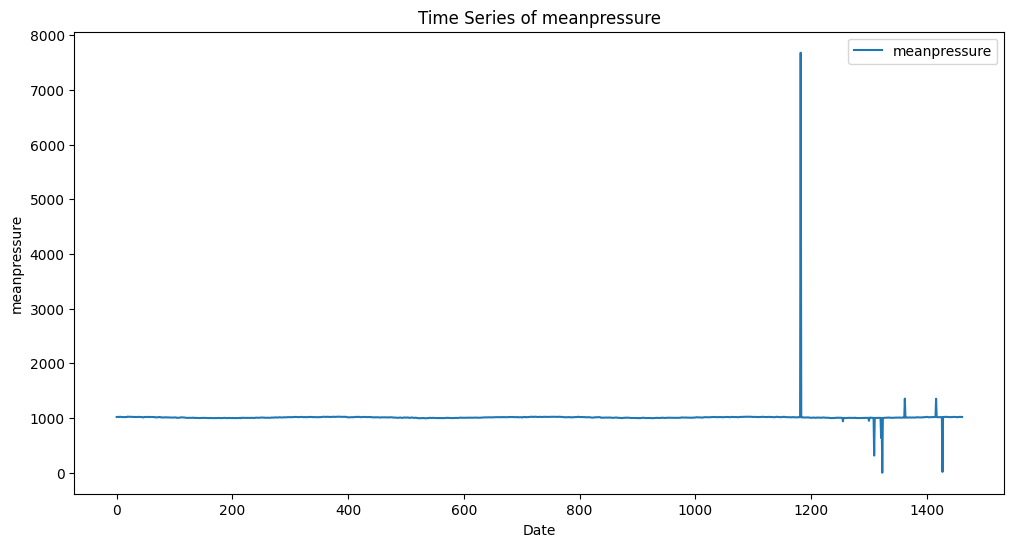

In [13]:
for column in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']: #for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()

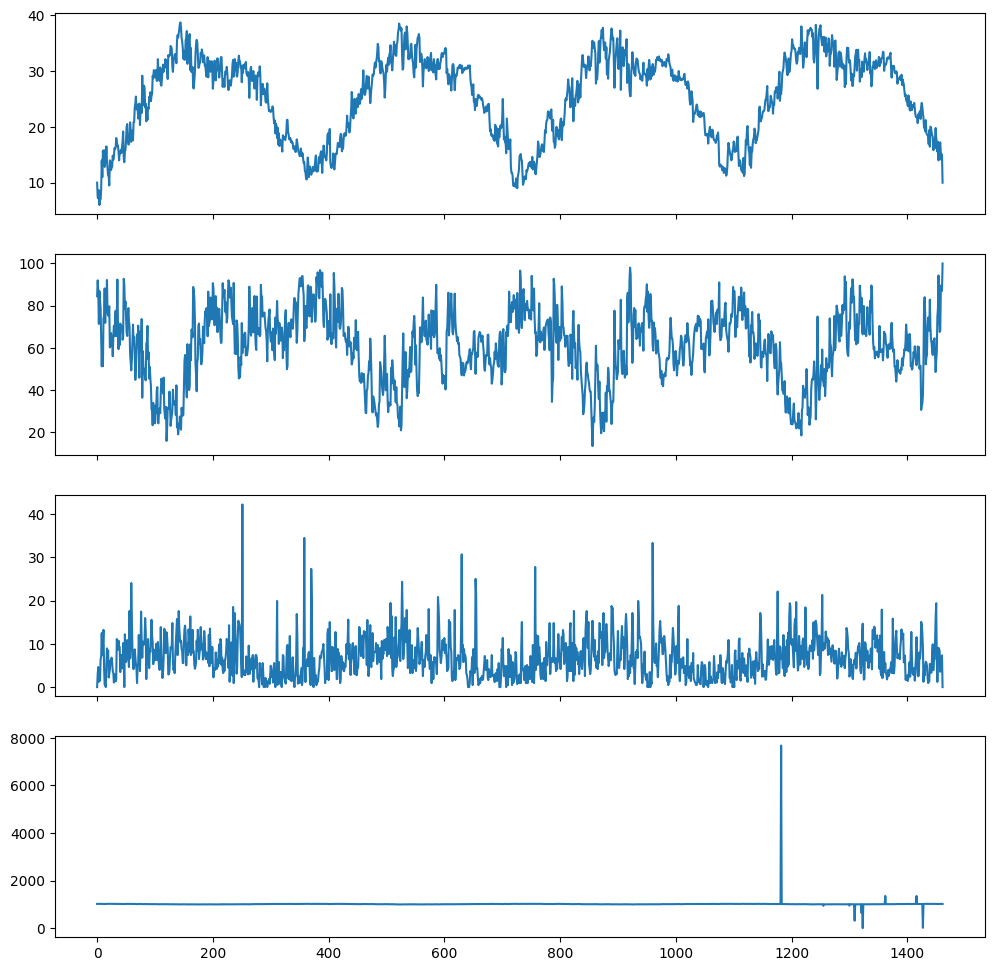

In [16]:
fig, axes= plt.subplots(4, 1, figsize=(12, 12), sharex=True)
axes[0].plot(df.index, df['meantemp'], label='meantemp')
axes[1].plot(df.index, df['humidity'], label='humidity')
axes[2].plot(df.index, df['wind_speed'], label='wind_speed')
axes[3].plot(df.index, df['meanpressure'], label='meanpressure')

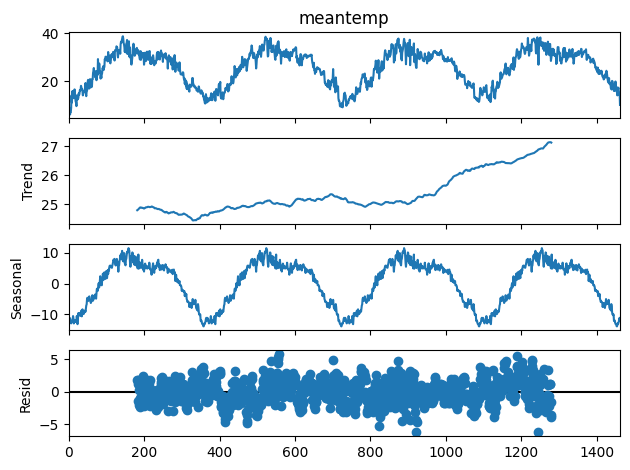

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['meantemp'], model='additive', period=365)
result.plot()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
variable = 'meantemp'
train_df, test_df = train_test_split(df[variable], test_size=0.2, shuffle=False)

In [20]:
model = ExponentialSmoothing(train_df, seasonal='add', seasonal_periods=365).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [21]:
predictions = model.predict(start=len(train_df), end=len(df)-1)

mae = mean_absolute_error(test_df, predictions)
rmse = np.sqrt(mean_squared_error(test_df, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.1126356798977772
Root Mean Squared Error (RMSE): 2.640482365485532
